# Analysis on penetration pricing

In [1]:
# Loading prerequisite libraries

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Load CSV to a pandas dataframe

df = pd.read_csv('Products.csv',infer_datetime_format=True, parse_dates=True)

In [3]:
# filter only useful columns

df = df[["Price-Max", "Price-Min", "Availability", "Date-Seen", "On-Sale", "Merchant", "Brand", "Date-Added", "Date-Updated", "Name", "Manufacturer-Id", "Price-Source-URLs"]]


In [4]:
# create a time series

df = df.drop('Date-Seen', axis=1).join(
  df['Date-Seen'].str.split(',', expand=True).stack().reset_index(level=1,drop=True).rename('Date-Seen'))

df['Date-Seen'] = pd.to_datetime(df['Date-Seen'])

In [5]:
df

,Price-Max,Price-Min,Availability,On-Sale,Merchant,Brand,Date-Added,Date-Updated,Name,Manufacturer-Id,Price-Source-URLs,Date-Seen
0,799.99,799.99,In Stock,False,Bestbuy.com,Hisense,2018-03-16T01:47:45Z,2018-06-13T19:36:51Z,Hisense - 55 class - led - h9 series - 2160p -...,55H9D PLUS,https://www.bestbuy.com/site/hisense-55-class-...,2018-05-26 15:00:00+00:00
0,799.99,799.99,In Stock,False,Bestbuy.com,Hisense,2018-03-16T01:47:45Z,2018-06-13T19:36:51Z,Hisense - 55 class - led - h9 series - 2160p -...,55H9D PLUS,https://www.bestbuy.com/site/hisense-55-class-...,2018-05-02 14:00:00+00:00
1,599.99,599.99,In Stock,False,Hisense USA Corporation,Hisense,2018-03-16T01:47:45Z,2018-06-13T19:36:51Z,Hisense - 55 class - led - h9 series - 2160p -...,55H9D PLUS,https://www.walmart.com/ip/Hisense-55H9DPLUS-5...,2018-04-26 17:00:00+00:00
2,599.99,599.99,In Stock,True,Bestbuy.com,Hisense,2018-03-16T01:47:45Z,2018-06-13T19:36:51Z,Hisense - 55 class - led - h9 series - 2160p -...,55H9D PLUS,https://www.bestbuy.com/site/hisense-55-class-...,2018-05-26 15:00:00+00:00
3,699.99,699.99,In Stock,False,Hisense USA Corporation,Hisense,2018-03-16T01:47:45Z,2018-06-13T19:36:51Z,Hisense - 55 class - led - h9 series - 2160p -...,55H9D PLUS,https://www.walmart.com/ip/Hisense-55H9DPLUS-5...,2018-03-09 18:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
166,1199.99,898.00,In Stock,True,Beach Camera,Sony,2017-03-06T14:57:09Z,2018-06-13T19:36:04Z,Sony - 55 class - led - x800e series - 2160p -...,XBR55X800E,https://www.walmart.com/ip/Sony-XBR-55X800E-55...,2017-11-16 19:00:00+00:00
166,1199.99,898.00,In Stock,True,Beach Camera,Sony,2017-03-06T14:57:09Z,2018-06-13T19:36:04Z,Sony - 55 class - led - x800e series - 2160p -...,XBR55X800E,https://www.walmart.com/ip/Sony-XBR-55X800E-55...,2017-10-24 01:00:00+00:00
167,999.99,999.99,In Stock,False,Bestbuy.com,Sony,2017-03-06T14:57:09Z,2018-06-13T19:36:04Z,Sony - 55 class - led - x800e series - 2160p -...,XBR55X800E,http://www.bestbuy.com/site/sony-55-class-54-6...,2017-08-01 03:00:00+00:00
167,999.99,999.99,In Stock,False,Bestbuy.com,Sony,2017-03-06T14:57:09Z,2018-06-13T19:36:04Z,Sony - 55 class - led - x800e series - 2160p -...,XBR55X800E,http://www.bestbuy.com/site/sony-55-class-54-6...,2017-07-26 15:00:00+00:00


## Websites

In [6]:
# how many websites do we have?

df["Website"] = df["Price-Source-URLs"].str.extract(r'\.([^\.]+)\.')
list(df["Website"].unique())

['bestbuy', 'walmart', 'ebay', 'bhphotovideo']

## TV models

In [7]:
list(df["Manufacturer-Id"].unique())

['55H9D PLUS',
 'UN55KU7000FXZA',
 'XBR55A1E',
 'QN55Q8FNBFXZA',
 'XBR55X900F',
 'UN55MU6490FXZA',
 '55UJ7700',
 'QN55Q7CAMFXZA',
 '55H8C',
 'XBR55X700D',
 'XBR55X800E']

## TV brands

In [22]:
list(df["Brand"].unique())

['Hisense', 'Samsung', 'Sony', 'Lg']

# 55-inch TV prices on each website

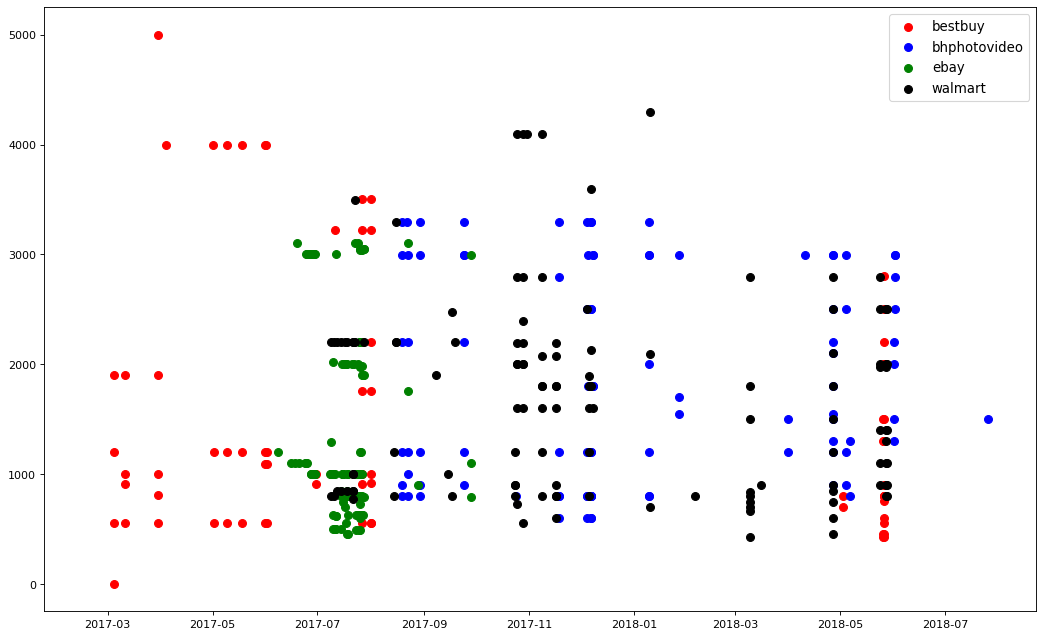

In [15]:
# Create as many colors as there are unique df['Website']
Website = np.unique(df['Website'])
colors = ["red", "blue", "green", "black"]


# Draw Plot for Each Website
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, Website in enumerate(Website):
    plt.scatter('Date-Seen', 'Price-Min', 
                data=df.loc[df.Website==Website, :], 
                s=50, c=colors[i], label=str(Website))
    
plt.legend(fontsize=12)

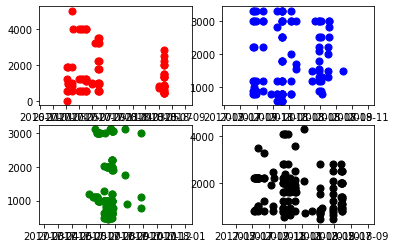

In [9]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter('Date-Seen', 'Price-Min', data=df.loc[df.Website=="bestbuy", :], s=50, c="red")
ax2.scatter('Date-Seen', 'Price-Min', data=df.loc[df.Website=="bhphotovideo", :], s=50, c="blue")
ax3.scatter('Date-Seen', 'Price-Min', data=df.loc[df.Website=="ebay", :], s=50, c="green")
ax4.scatter('Date-Seen', 'Price-Min', data=df.loc[df.Website=="walmart", :], s=50, c="black")

## Evolution of prices for each model in each website

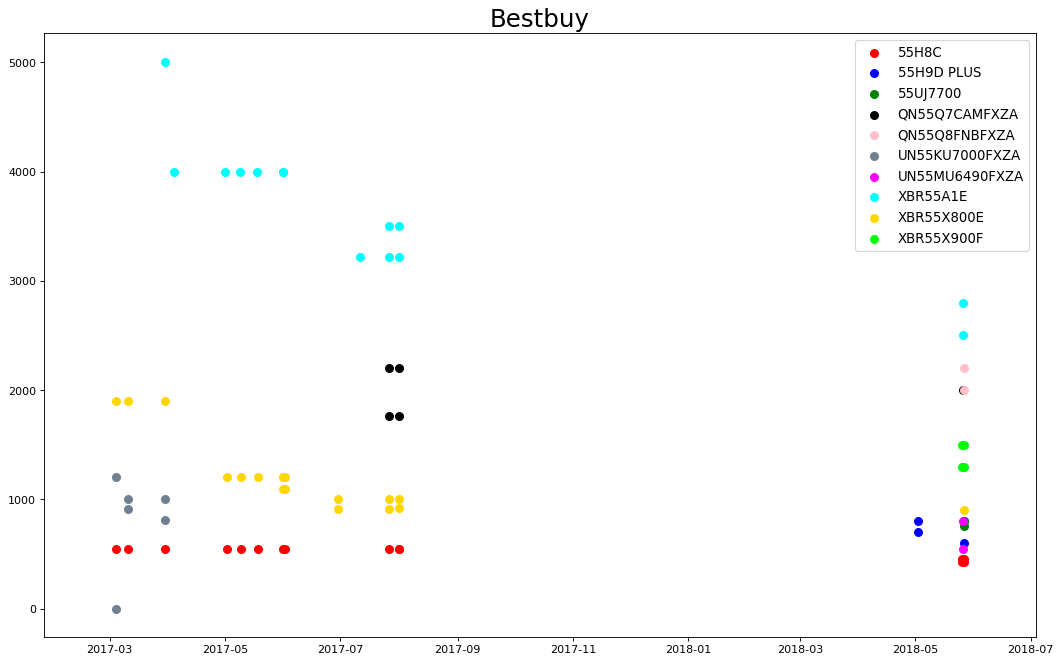

In [16]:
df1 = df[df["Website"] == "bestbuy"]

# Create as many colors as there are unique df['Website']
ManufacturerId = np.unique(df1['Manufacturer-Id'])
colors = ["red", "blue", "green", "black", "pink", "slategray", "magenta", "cyan", "gold", "lime"]


# Draw Plot for Each Website
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, ManufacturerId in enumerate(ManufacturerId):
    plt.scatter('Date-Seen', 'Price-Min', 
                data=df1.loc[df1["Manufacturer-Id"] == ManufacturerId, :], 
                s=50, c=colors[i], label=str(ManufacturerId))
    
plt.title("Bestbuy", fontsize=22)
plt.legend(fontsize=12)

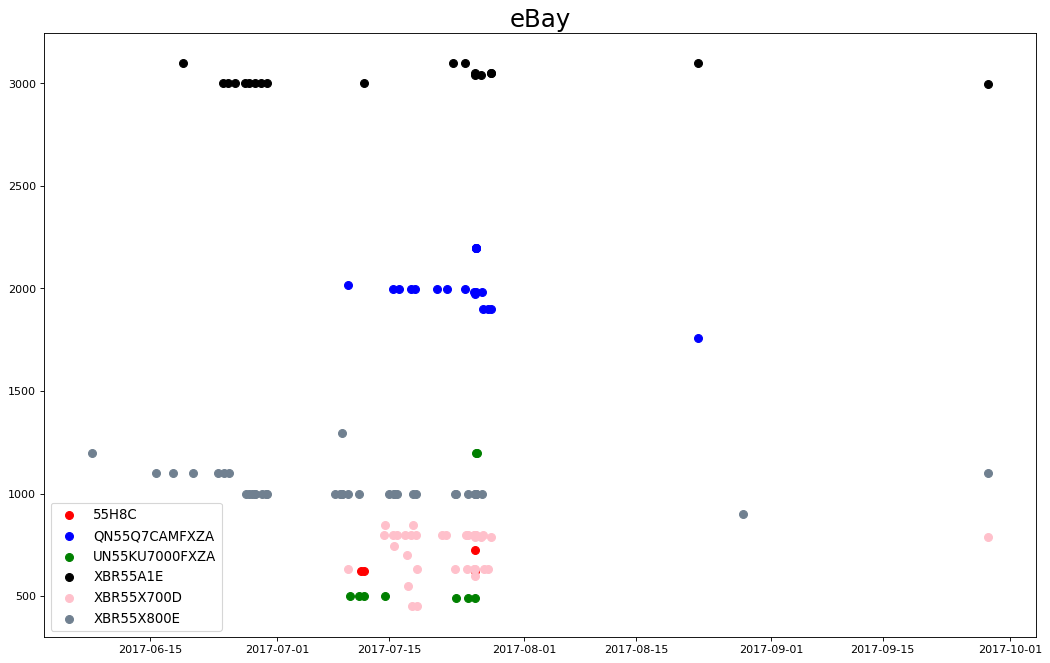

In [17]:
df1 = df[df["Website"] == "ebay"]

# Create as many colors as there are unique df['Website']
ManufacturerId = np.unique(df1['Manufacturer-Id'])
colors = ["red", "blue", "green", "black", "pink", "slategray", "magenta", "cyan", "gold", "lime"]


# Draw Plot for Each Website
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, ManufacturerId in enumerate(ManufacturerId):
    plt.scatter('Date-Seen', 'Price-Min', 
                data=df1.loc[df1["Manufacturer-Id"] == ManufacturerId, :], 
                s=50, c=colors[i], label=str(ManufacturerId))
    
plt.title("eBay", fontsize=22)
plt.legend(fontsize=12)

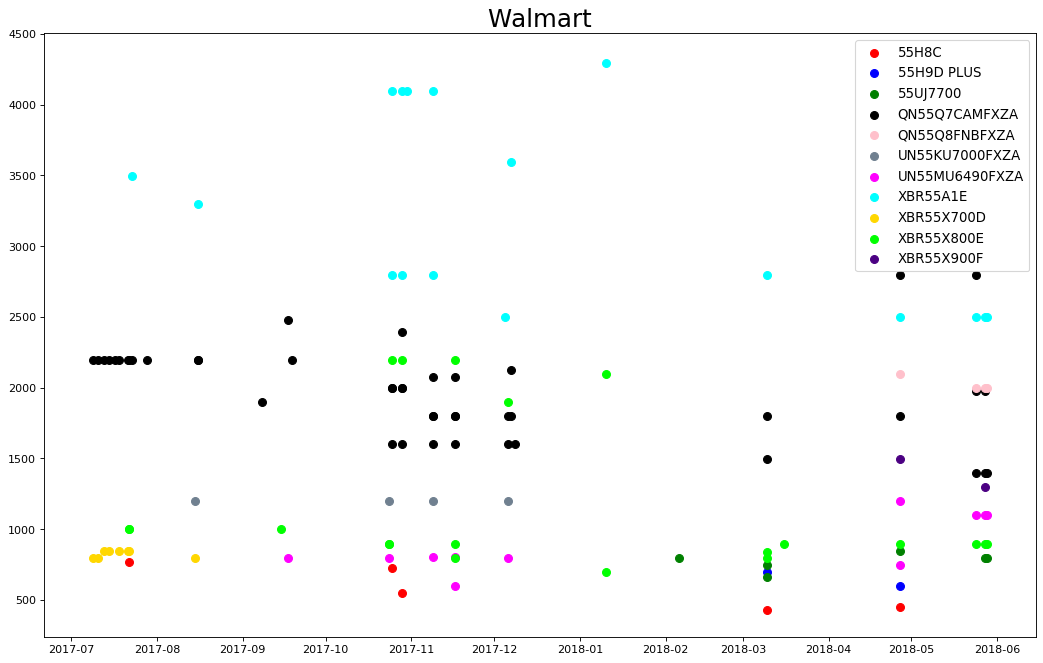

In [19]:
df1 = df[df["Website"] == "walmart"]

# Create as many colors as there are unique df['Website']
ManufacturerId = np.unique(df1['Manufacturer-Id'])
colors = ["red", "blue", "green", "black", "pink", "slategray", "magenta", "cyan", "gold", "lime", "indigo"]


# Draw Plot for Each Website
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, ManufacturerId in enumerate(ManufacturerId):
    plt.scatter('Date-Seen', 'Price-Min', 
                data=df1.loc[df1["Manufacturer-Id"] == ManufacturerId, :], 
                s=50, c=colors[i], label=str(ManufacturerId))
    
plt.title("Walmart", fontsize=22)
plt.legend(fontsize=12)

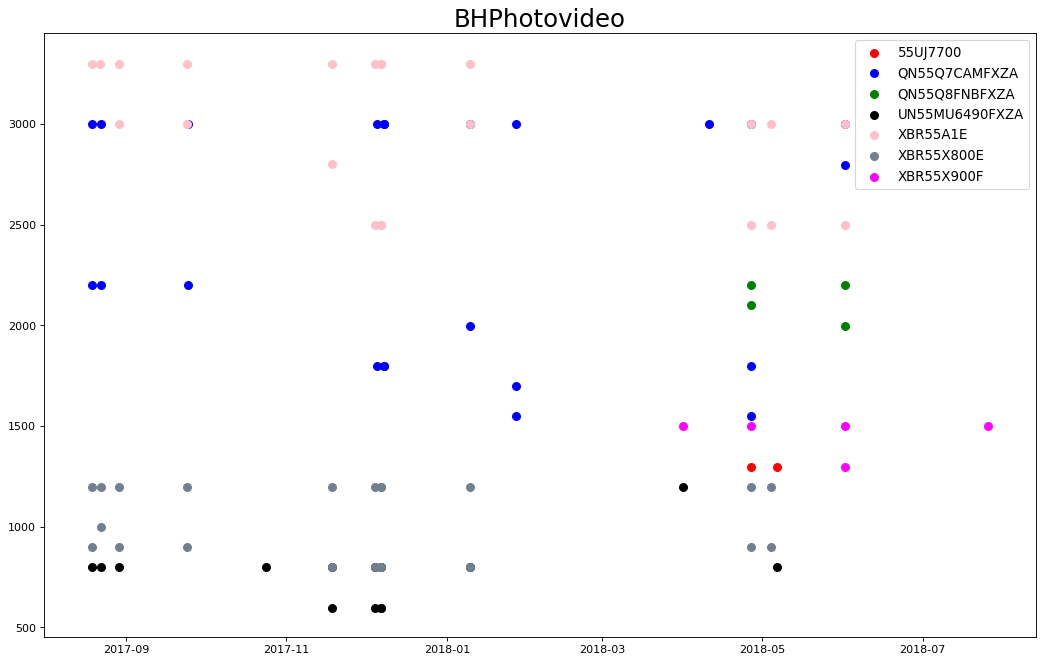

In [20]:
df1 = df[df["Website"] == "bhphotovideo"]

# Create as many colors as there are unique df['Website']
ManufacturerId = np.unique(df1['Manufacturer-Id'])
colors = ["red", "blue", "green", "black", "pink", "slategray", "magenta", "cyan", "gold", "lime"]


# Draw Plot for Each Website
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, ManufacturerId in enumerate(ManufacturerId):
    plt.scatter('Date-Seen', 'Price-Min', 
                data=df1.loc[df1["Manufacturer-Id"] == ManufacturerId, :], 
                s=50, c=colors[i], label=str(ManufacturerId))
    
plt.title("BHPhotovideo", fontsize=22)
plt.legend(fontsize=12)

# Prices overtime for each brand

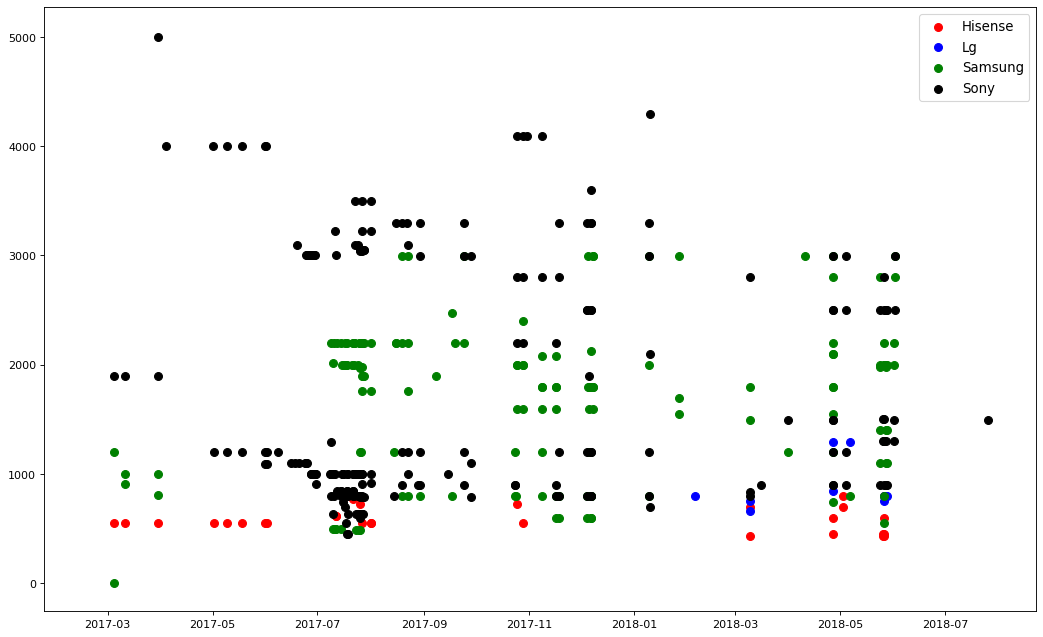

In [24]:
# Create as many colors as there are unique df['Website']
Brand = np.unique(df['Brand'])
colors = ["red", "blue", "green", "black"]


# Draw Plot for Each Website
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, Brand in enumerate(Brand):
    plt.scatter('Date-Seen', 'Price-Min', 
                data=df.loc[df.Brand==Brand, :], 
                s=50, c=colors[i], label=str(Brand))
    
plt.legend(fontsize=12)

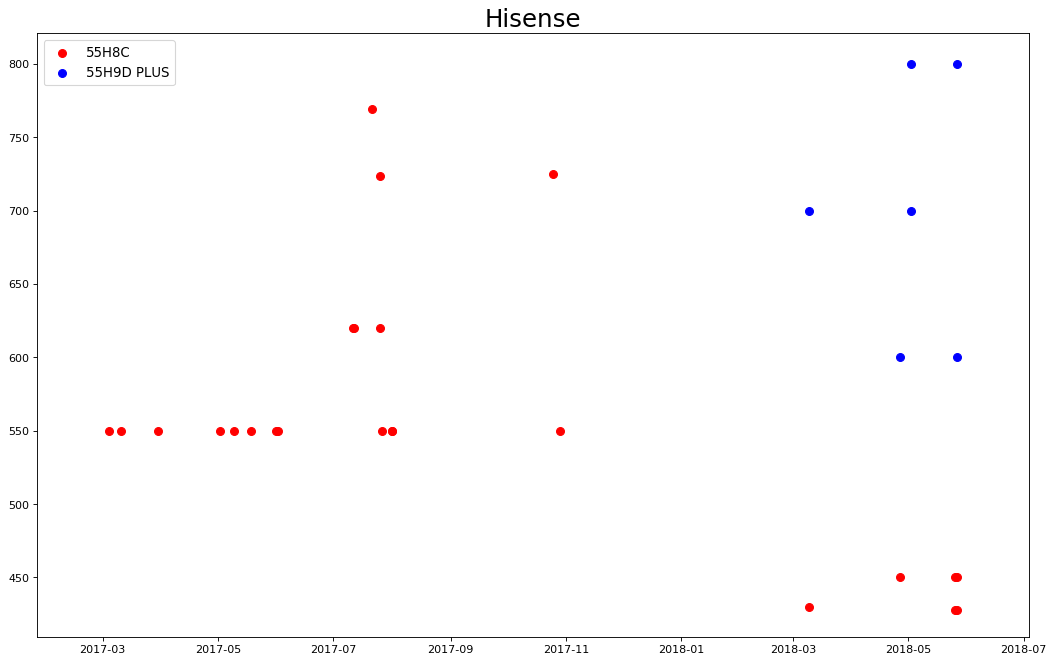

In [26]:
df1 = df[df["Brand"] == "Hisense"]

# Create as many colors as there are unique df['Website']
ManufacturerId = np.unique(df1['Manufacturer-Id'])
colors = ["red", "blue", "green", "black", "pink", "slategray", "magenta", "cyan", "gold", "lime"]


# Draw Plot for Each Website
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, ManufacturerId in enumerate(ManufacturerId):
    plt.scatter('Date-Seen', 'Price-Min', 
                data=df1.loc[df1["Manufacturer-Id"] == ManufacturerId, :], 
                s=50, c=colors[i], label=str(ManufacturerId))
    
plt.title("Hisense", fontsize=22)
plt.legend(fontsize=12)

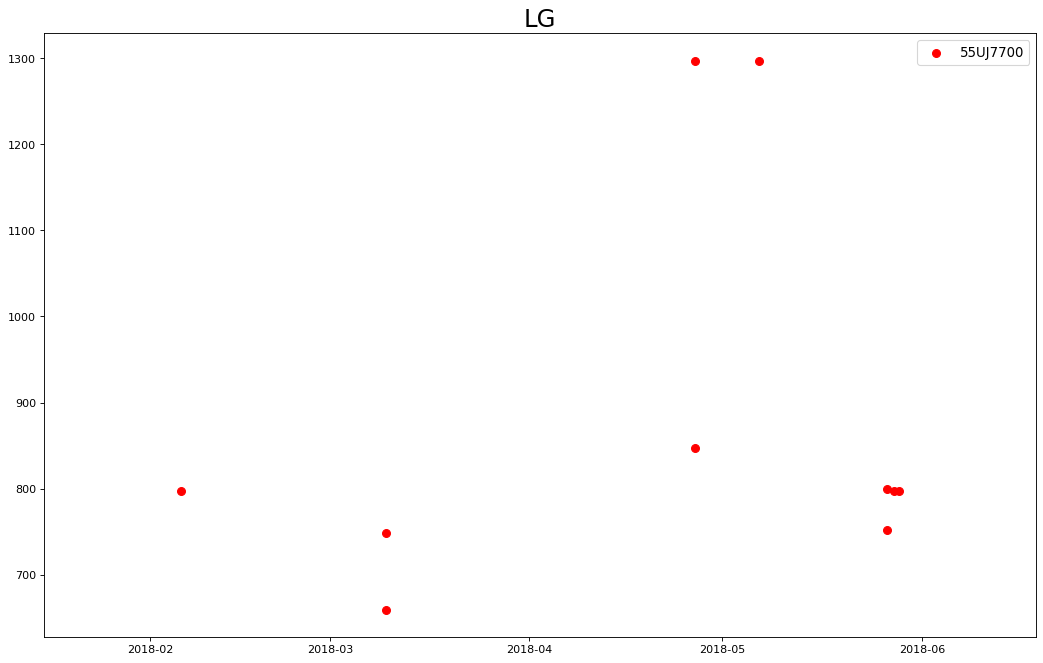

In [28]:
df1 = df[df["Brand"] == "Lg"]

# Create as many colors as there are unique df['Website']
ManufacturerId = np.unique(df1['Manufacturer-Id'])
colors = ["red", "blue", "green", "black", "pink", "slategray", "magenta", "cyan", "gold", "lime"]


# Draw Plot for Each Website
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, ManufacturerId in enumerate(ManufacturerId):
    plt.scatter('Date-Seen', 'Price-Min', 
                data=df1.loc[df1["Manufacturer-Id"] == ManufacturerId, :], 
                s=50, c=colors[i], label=str(ManufacturerId))
    
plt.title("LG", fontsize=22)
plt.legend(fontsize=12)

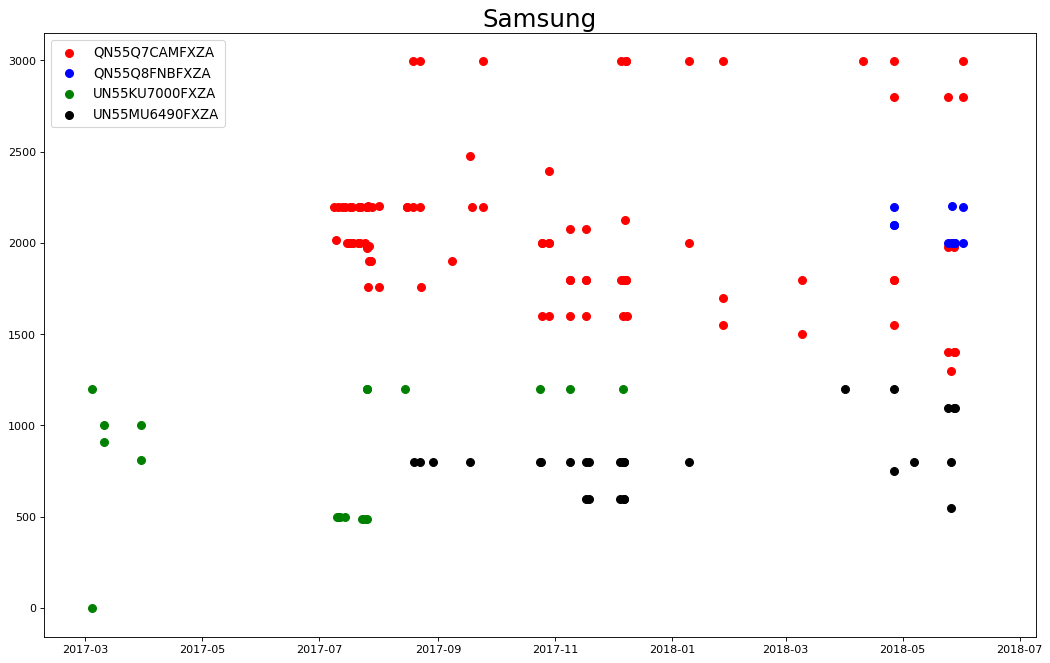

In [29]:
df1 = df[df["Brand"] == "Samsung"]

# Create as many colors as there are unique df['Website']
ManufacturerId = np.unique(df1['Manufacturer-Id'])
colors = ["red", "blue", "green", "black", "pink", "slategray", "magenta", "cyan", "gold", "lime"]


# Draw Plot for Each Website
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, ManufacturerId in enumerate(ManufacturerId):
    plt.scatter('Date-Seen', 'Price-Min', 
                data=df1.loc[df1["Manufacturer-Id"] == ManufacturerId, :], 
                s=50, c=colors[i], label=str(ManufacturerId))
    
plt.title("Samsung", fontsize=22)
plt.legend(fontsize=12)

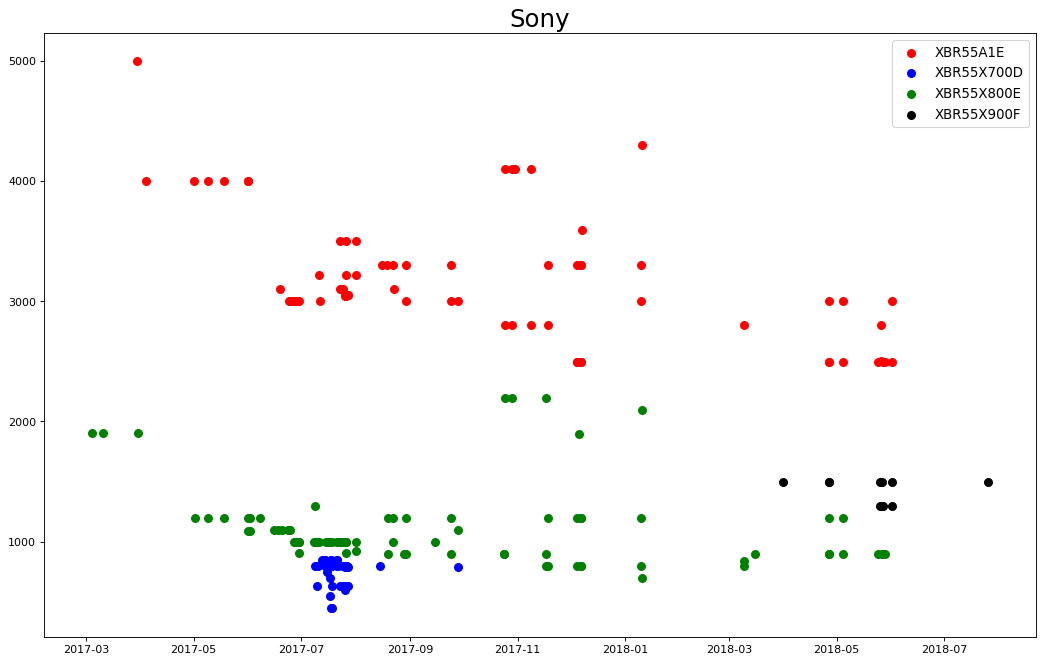

In [30]:
df1 = df[df["Brand"] == "Sony"]

# Create as many colors as there are unique df['Website']
ManufacturerId = np.unique(df1['Manufacturer-Id'])
colors = ["red", "blue", "green", "black", "pink", "slategray", "magenta", "cyan", "gold", "lime"]


# Draw Plot for Each Website
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, ManufacturerId in enumerate(ManufacturerId):
    plt.scatter('Date-Seen', 'Price-Min', 
                data=df1.loc[df1["Manufacturer-Id"] == ManufacturerId, :], 
                s=50, c=colors[i], label=str(ManufacturerId))
    
plt.title("Sony", fontsize=22)
plt.legend(fontsize=12)